In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Importando blibiotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
path = 'drive//My Drive//train_loan_prediction.csv'
df = pd.read_csv(path)

- Visualização do dataset

In [ ]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- O Heatmap abaixo mostra os dados nulos em evidência

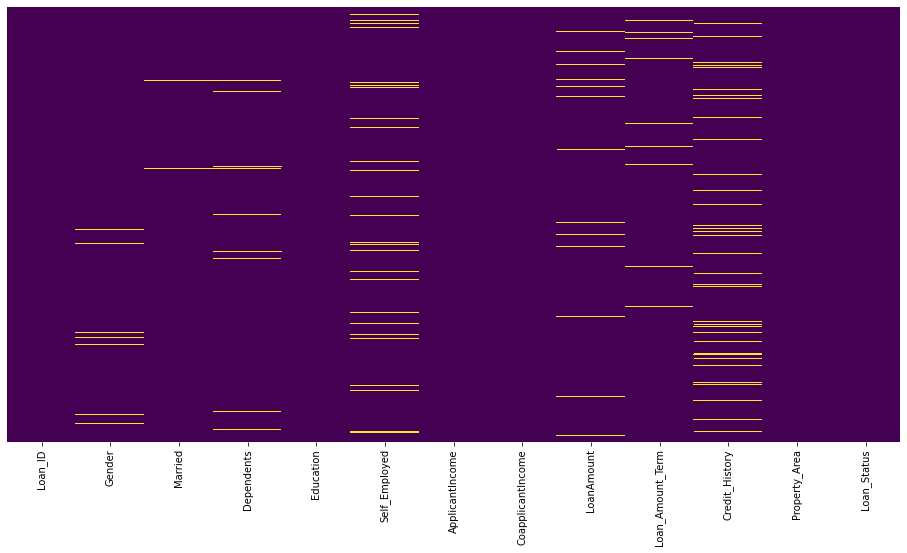

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis', cbar= False)

- Somando os dados nulos de cada coluna, obtemos o resultado abaixo:

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Optei por seguir no caminho de excluir todas as linhas do dataset que tiverem qualquer dado nulo

In [ ]:
df.dropna(axis=0, how='any', inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- Visualização, novamente através do Heatmap, confirmando a inexistência de dados nulos após a exclusão acima.

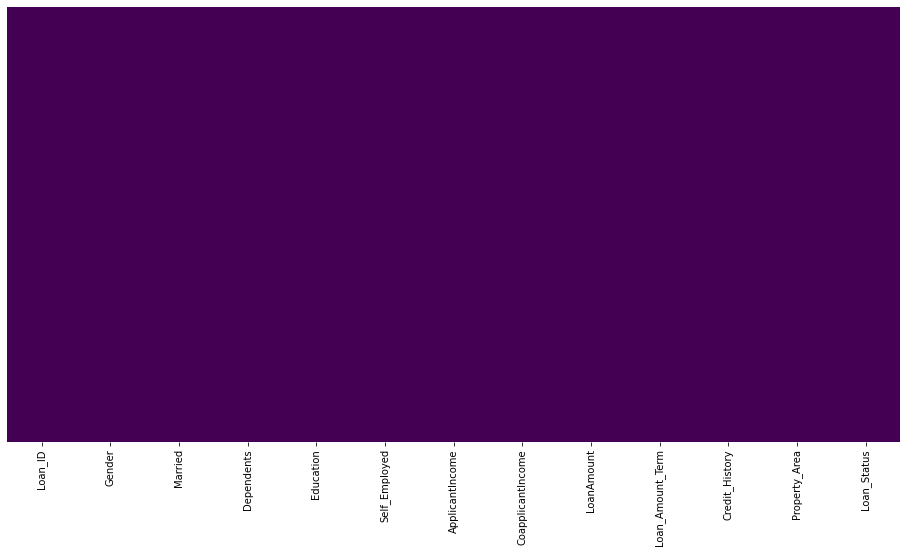

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis', cbar= False)

- Visualização dos dados através de gráficos:

Aprovação de empréstimo X Gênero

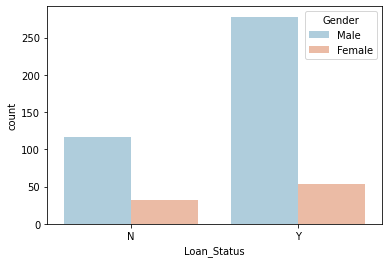

In [ ]:
sns.countplot(x = 'Loan_Status', data = df, hue='Gender', palette='RdBu_r')

Aprovação de empréstimo X Área

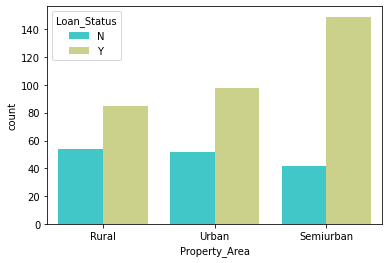

In [ ]:
sns.countplot(x='Property_Area', data = df, hue='Loan_Status', palette='rainbow')

- Manipulação dos dados String p/ Int

In [ ]:
def muda_sex(col):
  sex = col[0]

  if sex == 'Male':
    return 0
  else:
    return 1

In [ ]:
df['Gender'] = df[['Gender']].apply(muda_sex, axis=1)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,0,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
def muda_status(col):
  status = col[0]

  if status == 'Y':
    return 0
  else:
    return 1

In [ ]:
df['Loan_Status'] = df[['Loan_Status']].apply(muda_status, axis=1)

In [ ]:
def muda_married(col):
  married = col[0]

  if married == 'Yes':
    return 0
  else:
    return 1

In [ ]:
df['Married'] = df[['Married']].apply(muda_married, axis=1)

In [ ]:
def muda_graduate(col):
  graduate = col[0]

  if graduate == 'Graduate':
    return 0
  else:
    return 1

In [ ]:
df['Education'] = df[['Education']].apply(muda_graduate, axis=1)

In [ ]:
def muda_employed(col):
  employed = col[0]

  if employed == 'Yes':
    return 0
  else:
    return 1

In [ ]:
df['Self_Employed'] = df[['Self_Employed']].apply(muda_employed, axis=1)

In [ ]:
def muda_area(col):
  area = col[0]

  if area == 'Urban':
    return 0
  if area == 'Rural':
    return 1
  if area == 'Semiurban':
    return 2

In [ ]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [ ]:
df['Property_Area'] = df[['Property_Area']].apply(muda_area, axis=1)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,1,1
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,0,0
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,0
4,LP001008,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,0
5,LP001011,0,0,2,0,0,5417,4196.0,267.0,360.0,1.0,0,0


Coluna de ID excluída pois estava dando errro ao rodar o modelo

In [ ]:
del df['Loan_ID']

Tratamento dos dados de número de dependentes:

In [ ]:
def muda_dependents(col):
  dependents = col[0]

  if dependents == '0':
    return 0
  if dependents == '1':
    return 1
  if dependents == '2':
    return 2
  if dependents == '3+':
    return 3

In [ ]:
df['Dependents'] = df[['Dependents']].apply(muda_dependents, axis=1)

Resultado do tratamento de dados:

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,1,1
2,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,0,0
3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,0
4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,0
5,0,0,2,0,0,5417,4196.0,267.0,360.0,1.0,0,0


- Aplicando o método e o modelo no dataset tratado:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

Utilizo o drop na coluna de 'Loan_Status' para que o computador não tenha todas as respostas

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Loan_Status', axis=1), df['Loan_Status'], test_size = 0.3)

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       103
           1       0.95      0.46      0.62        41

    accuracy                           0.84       144
   macro avg       0.89      0.73      0.76       144
weighted avg       0.86      0.84      0.82       144

